<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
    The layer that accepts input from our dataset.
### Hidden Layer:
    Layers between the input and output layers which apply logic to weights and pass on new weights to the next layer.
### Output Layer:
    The last layer in the network. Applies an activation function to create an output relevant to the problem at hand.
### Neuron:
    A single unit in the network capable of performing the logic required at its level.
### Weight:
    A multiplier for the inputs applied at each level of the network. A weight * an input + the bias is the prediction for that neuron.
### Activation Function:
    A function that tranforms output vectors into a relevant form.
### Node Map:
    A schematic of a neural network.
### Perceptron:
    A simple neuron that employs a gradient descent algorithm for finding the weights that produce the lowest prediction error.

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here

## Write your own perceptron code that can correctly classify a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
class Perceptron(object):
    """Perceptron estimator with early stopping.
    
    :param learning_rate: float Estimator learning rate. Default == 0.01
    :param epochs: int Number of epochs to run Perceptron. Default = 1000
    :param early_stopping: int Number of epochs without imoprovement at which to stop estimator. Default = 10
    
    """
    
    def __init__(self, learning_rate=0.01, epochs=100, early_stopping=10):
        self.lr = learning_rate
        self.epochs = epochs
        self.early_stopping = early_stopping
        
    def predict(self,row):
        """Apply weights and add bias to inputs.
        
        Return 1 if output is greater or equal zero, else zero for each element in input row.
        """
        
        return (np.dot(row, self.weight[1:]) + self.weight[0]) >= 0

    def fit(self, X, y):
        """Fit training data
        
        Initialize with random bias and weights.
        Update weights and bias with each row based on previous iteration's error.
        Store number of errors for each epoch.
        Stop if no errors in number of `early_stopping` epochs.
        """
        
        self.weight = np.array([np.random.random() for _ in range(X.shape[1] + 1)])
    
        self.errors_ = []
        
        for _ in range(self.epochs):
            error = 0
            for row, label in zip(X, y):
                
                # Check our current prediction against the actual label to get the error.
                # Multiply the result by the learning rate.
                adjustment = self.lr * (label - self.predict(row))
                
                # Adjust our weigts and bias accordingly.
                self.weight[1:] += adjustment * row
                self.weight[0] += adjustment
                
                # Add up our errors for each epoch.
                error += adjustment != 0.0
                
            # Make a list of number of errors per epoch.
            self.errors_.append(error)

            # If we've been correct each time for a number of rounds, stop already.
            if sum(self.errors_[-self.early_stopping:]) == 0:
                print('Stopped Early')
                break
                
        return self
                

In [35]:
nand = np.array([np.array([0, 0]),
                 np.array([0, 1]),
                 np.array([1, 0]),
                 np.array([1, 1])
                ])
y = np.array([1, 1, 1, 0])

In [36]:
perceptron = Perceptron()

In [37]:
perceptron.fit(nand, y)

Stopped Early


In [38]:
perceptron.predict(np.array([np.array([1, 1]),
                             np.array([0, 1]),
                             np.array([0, 0]),
                             np.array([1, 0])]))

array([False,  True,  True,  True])

In [39]:
# perceptron.errors

## Implement your own Perceptron Class and use it to classify a binary dataset like: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 
- [Titanic](https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv)
- [A two-class version of the Iris dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv)

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

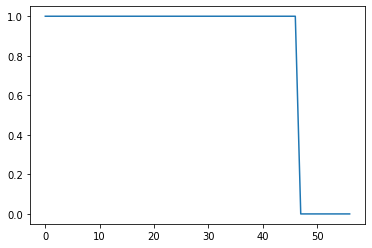

In [40]:
plt.plot(range(len(perceptron.errors_)), perceptron.errors_)

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv')

In [42]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [44]:
y = df['Species'].map(lambda x: 1.0 if x == 'Iris-virginica' else 0.0)

In [45]:
iris = Perceptron()

In [46]:
iris.fit(X.values, y.values)

In [47]:
one = [5.9, 3.0, 5.1, 1.8]

In [48]:
iris.predict(one)

True

In [49]:
two = [5.1, 3.5, 1.4, 0.2]

In [50]:
iris.predict(two)

False

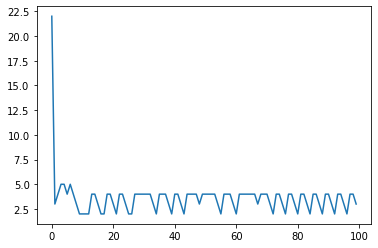

In [51]:
plt.plot(range(len(iris.errors_)), iris.errors_)

In [52]:
df1 = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')

In [53]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
# iris.errors

In [55]:
y1 = df1['Outcome'].astype(np.float)
X1 = df1.drop(columns='Outcome').astype(np.float)


In [74]:
diabetic = Perceptron(epochs=5000)

In [75]:
diabetic.fit(X1.values, y1.values)

In [76]:
one1 = [6, 148, 72, 35, 0, 33.6, 0.627, 50]

In [77]:
diabetic.predict(one1)

False

In [78]:
two1 = [8, 183, 64, 0, 0, 23.3, 0.672, 32]

In [79]:
diabetic.predict(two1)

True

In [80]:
three1 = [1, 89 ,66, 23, 94, 28.1, 0.167, 21]

In [81]:
diabetic.predict(three1)

False

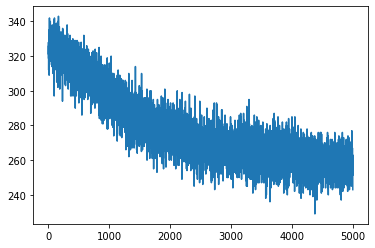

In [82]:
plt.plot(range(len(diabetic.errors_)), diabetic.errors_)

In [84]:
xor = Perceptron()
Xor = np.array([np.array([0, 0]),
                np.array([1, 0]),
                np.array([0, 1]),
                np.array([1, 1])])

yor = np.array([[0], [1], [1], [0]])

xor.fit(Xor, yor)

xor.predict(np.array([np.array([1, 0]),
                      np.array([1, 1]),
                      np.array([0, 1]), 
                      np.array([0, 0])]))

array([False,  True, False, False])

In [135]:
class DoublePerceptron(object):
    """Combines output of two Perceptrons as input to a final Perceptron.
    
    """
    
    def __init__(self):
        self.perc = Perceptron()
        
    def fit(self, X, y):
        """Fit two Perceptrons to the data, zip outputs together to use as input
        for self.perc.
        """
        self.one = Perceptron().fit(X, y)
        self.two = Perceptron().fit(X, y)
        
        inputs = np.array([np.array([one, two]) for one, two in zip(self.one.predict(X),
                                                                    self.two.predict(X))])
        self.perc.fit(inputs, y)
        
    def _predict(self, X):
        """Use predictions from self.one and self.two to predict yhat from X."""
        inputs = np.array([np.array([one, two]) for one, two in zip(self.one.predict(X),
                                                                    self.two.predict(X))])
        return self.perc.predict(inputs)


In [136]:
doubs = DoublePerceptron()

In [137]:
doubs.fit(xorset, xory)

Stopped Early


In [138]:
doubs._predict(np.array([np.array([1, 0]),
                         np.array([0, 1]), 
                         np.array([1, 1]),
                         np.array([0, 0])]))

array([ True,  True, False, False])

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?